In [1]:
# Imports
# Data handling
import pandas as pd
# Mathematical operations
import numpy as np
import math
# Visulization 
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Ads_CTR_Optimisation.csv')

In [3]:
# Top 5 rows
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Shape of the data
data.shape

(10000, 10)

#**Preparing the experiment**

In [5]:
# Set the observation to iterate over
observations = 10000

# Set machines that to be iterated 
machines = 10

# Which machine is selected for particular iteration 
numbers_of_selections_of_each_machine = [0] * machines

# Rewards generated 
sums_of_rewards_for_each_machine = [0] * machines

# Machine selected in current iteration
machines_selected = []

# To store total reward produced by algorithm
total_rewards = 0

#**Run the UCB on given dataset**

In [6]:
for n in range(observations):
    bandit = 0
    max_upper_bound = 0
    
    for i in range(machines):
        if (numbers_of_selections_of_each_machine[i] > 0):        
            average_reward = sums_of_rewards_for_each_machine[i] / numbers_of_selections_of_each_machine[i]           
            di = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_machine[i])           
            upper_bound = average_reward + di
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            bandit = i
   
   # store results
    machines_selected.append(bandit) 
    numbers_of_selections_of_each_machine[bandit] = numbers_of_selections_of_each_machine[bandit] + 1
    reward = data.values[n, bandit]
    sums_of_rewards_for_each_machine[bandit] = sums_of_rewards_for_each_machine[bandit] + reward
    total_rewards = total_rewards + reward


#**Visualize the result**

In [7]:
# Printing results and rewards
print("\n\nRewards By Machine = ", sums_of_rewards_for_each_machine)
print("\nTotal Rewards by UCB = ", total_rewards)
print("\nMachine Selected At Each Round By Thompson Sampling : \n", machines_selected)



Rewards By Machine =  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

Total Rewards by UCB =  2178

Machine Selected At Each Round By Thompson Sampling : 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 

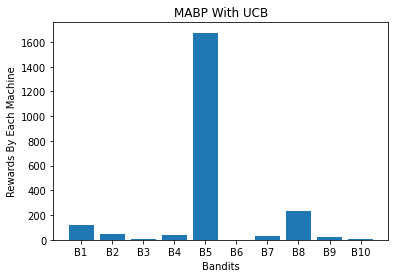

In [8]:
#Visualizing the rewards of each machine
plt.bar(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],sums_of_rewards_for_each_machine)
plt.title('MABP With UCB')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()

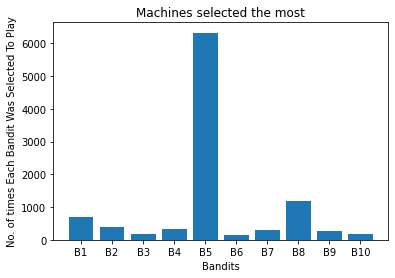

In [9]:
#Visualizing the selections of each machine
plt.bar(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],numbers_of_selections_of_each_machine)
plt.title('Machines selected the most')
plt.xlabel('Bandits')
plt.ylabel('No. of times Each Bandit Was Selected To Play')
plt.show()